# Part A Task 1

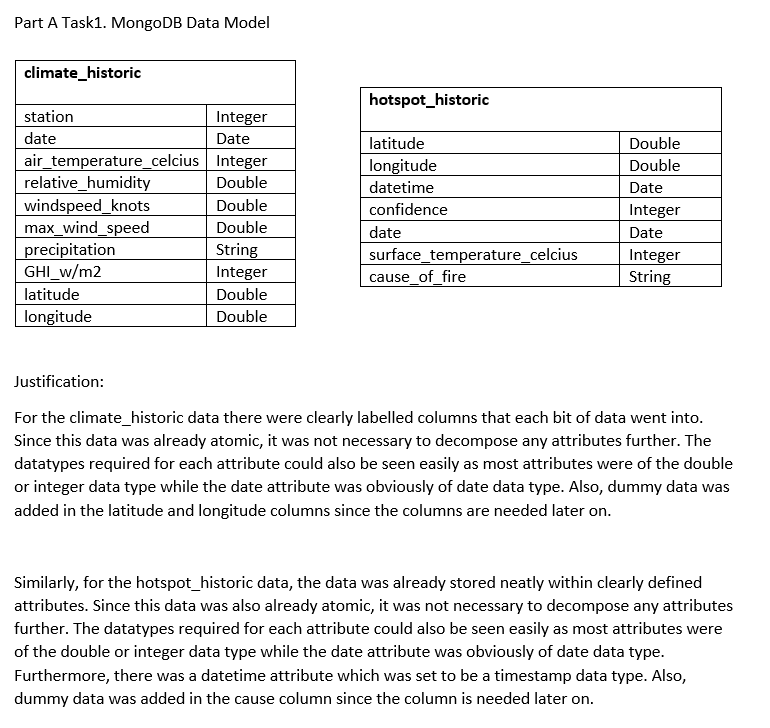

# Part A Task 2

## 1. Create collections from csv file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timezone
from datetime import timedelta
from pprint import pprint

In [2]:
df_climate = pd.read_csv("climate_historic.csv")
df_hotspot = pd.read_csv("hotspot_historic.csv")

In [3]:
df_climate.head()

,station,date,air_temperature_celcius,relative_humidity,windspeed_knots,max_wind_speed,precipitation,GHI_w/m2
0,948700,31/12/20,19,56.8,7.9,11.1,0.00I,154
1,948700,2/1/21,15,50.7,9.2,13.0,0.02G,128
2,948700,3/1/21,16,53.6,8.1,15.0,0.00G,133
3,948700,4/1/21,24,61.6,7.7,14.0,0.00I,186
4,948700,5/1/21,24,62.3,7.0,13.0,0.00I,185


In [4]:
df_hotspot.head()

,latitude,longitude,datetime,confidence,date,surface_temperature_celcius
0,-37.966,145.051,2021-12-27T04:16:51,78,27/12/2021,68
1,-35.541,143.311,2021-12-27T00:02:15,82,27/12/2021,63
2,-35.554,143.307,2021-12-27T00:02:15,67,27/12/2021,53
3,-35.543,143.316,2021-12-27T00:02:14,86,27/12/2021,67
4,-37.708,145.100,2021-12-25T04:29:08,80,25/12/2021,54


In [5]:
import pymongo
from pymongo import MongoClient

client = MongoClient()

In [6]:
db = client.fit3182_assignment_db

In [7]:
collection_climate = db.climate
collection_hotspot = db.hotspot

In [8]:
#insert into collection_climate, we have latitude and longitude columns filled with dummy data since these
#columns are used later on
for i in range(len(df_climate)):
    newEntry = {"station":int(df_climate.iloc[i]["station"]),
                "date": datetime.strptime(df_climate.iloc[i]["date"], "%d/%m/%y"),
                "air_temperature_celcius": int(df_climate.iloc[i]["air_temperature_celcius"]),
                "relative_humidity":df_climate.iloc[i]["relative_humidity"],
                "windspeed_knots": df_climate.iloc[i]["windspeed_knots"],
                "max_wind_speed": df_climate.iloc[i]["max_wind_speed"],
                "precipitation": df_climate.iloc[i]["precipitation "],
                "GHI_w/m2": int(df_climate.iloc[i]["GHI_w/m2"]),
                "latitude": 0,
                "longitude": 0
               }
    
    #insert into collection
    collection_climate.insert_one(newEntry)

In [16]:
#insert into collection_hotspot, we have cause column filled with dummy data since this column is needed
#later on
for i in range(len(df_hotspot)):
    newEntry = {"latitude": df_hotspot.iloc[i]["latitude"],
                "longitude": df_hotspot.iloc[i]["longitude"],
                "datetime": pd.to_datetime(df_hotspot.iloc[i]["datetime"]).to_pydatetime(),
                "confidence": int(df_hotspot.iloc[i]["confidence"]),
                "date": datetime.strptime(df_hotspot.iloc[i]["date"], "%d/%m/%Y"),
                "surface_temperature_celcius": int(df_hotspot.iloc[i]["surface_temperature_celcius"]),
                "cause_of_fire": "not specified"
               }
    
    #insert into collection
    collection_hotspot.insert_one(newEntry)

## 2. Querying MongoDB using PyMongo

### a. Find climate data on 12 December 2021

In [10]:
#use format 27/12/2021 (day/month/year)
#since the dates can have different timestamps, we should search for dates with timestamps for the day starting
#and the day ending
#in this specific case, since all the dates have the same timestamp of 00:00:00, this range search wasnt necessary

search_date_from = "12/12/2021" + "T00:00:00+00:00"
search_date_to = "12/12/2021" + "T23:59:59+00:00"

search_date_from = datetime.strptime(search_date_from, "%d/%m/%YT%H:%M:%S%z")
search_date_to = datetime.strptime(search_date_to, "%d/%m/%YT%H:%M:%S%z")

criteria = {"date" : {"$gte" : search_date_from, "$lte" : search_date_to} }  

results = collection_climate.find(criteria)

for document in results:
    pprint(document)

{'GHI_w/m2': 156,
 '_id': ObjectId('628b41a261e163e657727ddd'),
 'air_temperature_celcius': 19,
 'date': datetime.datetime(2021, 12, 12, 0, 0),
 'latitude': 0,
 'longitude': 0,
 'max_wind_speed': 12.0,
 'precipitation': ' 0.00I',
 'relative_humidity': 55.3,
 'station': 948702,
 'windspeed_knots': 6.2}


### b. Find latitude, longitude, surface temp and confidence when suface temp between 65 and 100

In [11]:
search_temp_from = 65
search_temp_to = 100

criteria = {"surface_temperature_celcius" : {"$gte" : search_temp_from, "$lte" : search_temp_to} }  

display = {"_id" : 0, "latitude" : 1, "longitude" : 1, "surface_temperature_celcius" : 1, "confidence" : 1}

results = collection_hotspot.find(criteria, display)

for document in results:
    pprint(document)

{'confidence': 78,
 'latitude': -37.966,
 'longitude': 145.05100000000002,
 'surface_temperature_celcius': 68}
{'confidence': 86,
 'latitude': -35.543,
 'longitude': 143.316,
 'surface_temperature_celcius': 67}
{'confidence': 93,
 'latitude': -37.875,
 'longitude': 142.51,
 'surface_temperature_celcius': 73}
{'confidence': 95,
 'latitude': -37.613,
 'longitude': 149.305,
 'surface_temperature_celcius': 75}
{'confidence': 90,
 'latitude': -37.624,
 'longitude': 149.314,
 'surface_temperature_celcius': 66}
{'confidence': 93,
 'latitude': -38.056999999999995,
 'longitude': 144.211,
 'surface_temperature_celcius': 73}
{'confidence': 92,
 'latitude': -37.95,
 'longitude': 142.366,
 'surface_temperature_celcius': 70}
{'confidence': 100,
 'latitude': -36.282,
 'longitude': 146.157,
 'surface_temperature_celcius': 71}
{'confidence': 100,
 'latitude': -37.641999999999996,
 'longitude': 149.263,
 'surface_temperature_celcius': 65}
{'confidence': 100,
 'latitude': -37.634,
 'longitude': 149.237,


 'longitude': 143.6243,
 'surface_temperature_celcius': 77}
{'confidence': 95,
 'latitude': -37.4028,
 'longitude': 143.6932,
 'surface_temperature_celcius': 75}
{'confidence': 92,
 'latitude': -37.4033,
 'longitude': 143.6884,
 'surface_temperature_celcius': 70}
{'confidence': 100,
 'latitude': -37.8249,
 'longitude': 143.6174,
 'surface_temperature_celcius': 98}
{'confidence': 93,
 'latitude': -36.6823,
 'longitude': 142.5024,
 'surface_temperature_celcius': 71}
{'confidence': 93,
 'latitude': -36.4489,
 'longitude': 144.7685,
 'surface_temperature_celcius': 73}
{'confidence': 67,
 'latitude': -37.34,
 'longitude': 149.3668,
 'surface_temperature_celcius': 74}
{'confidence': 99,
 'latitude': -36.7287,
 'longitude': 142.6017,
 'surface_temperature_celcius': 85}
{'confidence': 91,
 'latitude': -35.2363,
 'longitude': 143.0004,
 'surface_temperature_celcius': 69}
{'confidence': 100,
 'latitude': -35.2378,
 'longitude': 142.9864,
 'surface_temperature_celcius': 94}
{'confidence': 98,
 'l

### c. Find date, surface temp, air temp, relative humidity, max wind speed on 15 and 16 December 

In [12]:
#since the dates can have different timestamps, we should search for dates with timestamps for the day starting
#and the day ending

search_date_from = "15/12/2021" + "T00:00:00+00:00"
search_date_to = "16/12/2021" + "T23:59:59+00:00"

search_date_from = datetime.strptime(search_date_from, "%d/%m/%YT%H:%M:%S%z")
search_date_to = datetime.strptime(search_date_to, "%d/%m/%YT%H:%M:%S%z")

#aggregate pipeline constructed to first filter dates, then calculate average_suface_temp for each distinct 
#date, then a join is done with the collection_climate where we obtain the other attributes from
results = collection_hotspot.aggregate([
    {
        "$match": {"date" : {"$gte" : search_date_from, "$lte" : search_date_to}}
    },
    
    {
    "$group" : {"_id" : "$date", "surface_temperature_celcius" : {"$avg" : "$surface_temperature_celcius"}}
    },
    
    {
    "$lookup": { "from" : "climate",
                "localField" : "_id",
                "foreignField" : "date",
                "as" : "joineddata"}
    },
    
    {
        "$unwind" : "$joineddata"
    },
    
    {
        "$project": {
            "_id" : 0,
            "date" : "$joineddata.date",
            "surface_temperature_celcius" : 1,
            "air_temperature_celcius" : "$joineddata.air_temperature_celcius",
            "relative_humidity" : "$joineddata.relative_humidity",
            "max_wind_speed" : "$joineddata.max_wind_speed"   
        }
    }
])



for document in results:
    pprint(document)

{'air_temperature_celcius': 18,
 'date': datetime.datetime(2021, 12, 15, 0, 0),
 'max_wind_speed': 14.0,
 'relative_humidity': 52.0,
 'surface_temperature_celcius': 39.0}
{'air_temperature_celcius': 18,
 'date': datetime.datetime(2021, 12, 16, 0, 0),
 'max_wind_speed': 13.0,
 'relative_humidity': 53.7,
 'surface_temperature_celcius': 57.8}


### d. Find datetime, air temp, surface temp and confidence when confidence is between 80 and 100

In [13]:
search_confidence_from = 80
search_confidence_to = 100

#aggregate pipeline constructed to first filter by confidence, then join with collection_climate to obtain 
#the air_temp attribute for each datetime

results = collection_hotspot.aggregate([
    {
        "$match": {"confidence" : {"$gte" : search_confidence_from, "$lte" : search_confidence_to}}
    },
    
    {
    "$lookup": { "from" : "climate",
                "localField" : "date",
                "foreignField" : "date",
                "as" : "joineddata"}
    },
    
    {
        "$unwind" : "$joineddata"
    },
    
    {
        "$project": {
            "_id" : 0,
            "datetime" : 1,
            "air_temperature_celcius" : "$joineddata.air_temperature_celcius",
            "surface_temperature_celcius" : 1,
            "confidence" : 1
        }
    }
])



for document in results:
    pprint(document)
    
results

{'air_temperature_celcius': 28,
 'confidence': 82,
 'datetime': datetime.datetime(2021, 12, 27, 0, 2, 15),
 'surface_temperature_celcius': 63}
{'air_temperature_celcius': 28,
 'confidence': 86,
 'datetime': datetime.datetime(2021, 12, 27, 0, 2, 14),
 'surface_temperature_celcius': 67}
{'air_temperature_celcius': 17,
 'confidence': 80,
 'datetime': datetime.datetime(2021, 12, 25, 4, 29, 8),
 'surface_temperature_celcius': 54}
{'air_temperature_celcius': 18,
 'confidence': 94,
 'datetime': datetime.datetime(2021, 12, 16, 15, 38, 39),
 'surface_temperature_celcius': 43}
{'air_temperature_celcius': 18,
 'confidence': 93,
 'datetime': datetime.datetime(2021, 12, 16, 4, 35, 13),
 'surface_temperature_celcius': 73}
{'air_temperature_celcius': 18,
 'confidence': 84,
 'datetime': datetime.datetime(2021, 12, 16, 4, 34, 58),
 'surface_temperature_celcius': 55}
{'air_temperature_celcius': 18,
 'confidence': 95,
 'datetime': datetime.datetime(2021, 12, 16, 4, 34, 58),
 'surface_temperature_celcius'

{'air_temperature_celcius': 14,
 'confidence': 100,
 'datetime': datetime.datetime(2021, 9, 24, 15, 7, 47),
 'surface_temperature_celcius': 65}
{'air_temperature_celcius': 14,
 'confidence': 90,
 'datetime': datetime.datetime(2021, 9, 24, 15, 7, 47),
 'surface_temperature_celcius': 41}
{'air_temperature_celcius': 14,
 'confidence': 99,
 'datetime': datetime.datetime(2021, 9, 24, 15, 7, 47),
 'surface_temperature_celcius': 61}
{'air_temperature_celcius': 14,
 'confidence': 94,
 'datetime': datetime.datetime(2021, 9, 24, 15, 7, 45),
 'surface_temperature_celcius': 43}
{'air_temperature_celcius': 14,
 'confidence': 100,
 'datetime': datetime.datetime(2021, 9, 24, 15, 7, 45),
 'surface_temperature_celcius': 61}
{'air_temperature_celcius': 14,
 'confidence': 100,
 'datetime': datetime.datetime(2021, 9, 24, 13, 30, 10),
 'surface_temperature_celcius': 47}
{'air_temperature_celcius': 14,
 'confidence': 82,
 'datetime': datetime.datetime(2021, 9, 24, 13, 30, 9),
 'surface_temperature_celcius':

 'confidence': 92,
 'datetime': datetime.datetime(2021, 5, 4, 4, 44, 40),
 'surface_temperature_celcius': 70}
{'air_temperature_celcius': 10,
 'confidence': 87,
 'datetime': datetime.datetime(2021, 5, 4, 4, 44, 40),
 'surface_temperature_celcius': 62}
{'air_temperature_celcius': 10,
 'confidence': 89,
 'datetime': datetime.datetime(2021, 5, 4, 4, 44, 40),
 'surface_temperature_celcius': 65}
{'air_temperature_celcius': 10,
 'confidence': 99,
 'datetime': datetime.datetime(2021, 5, 4, 4, 44, 40),
 'surface_temperature_celcius': 86}
{'air_temperature_celcius': 10,
 'confidence': 84,
 'datetime': datetime.datetime(2021, 5, 4, 4, 44, 40),
 'surface_temperature_celcius': 58}
{'air_temperature_celcius': 10,
 'confidence': 100,
 'datetime': datetime.datetime(2021, 5, 4, 4, 44, 40),
 'surface_temperature_celcius': 93}
{'air_temperature_celcius': 10,
 'confidence': 100,
 'datetime': datetime.datetime(2021, 5, 4, 4, 44, 40),
 'surface_temperature_celcius': 105}
{'air_temperature_celcius': 10,
 'c

{'air_temperature_celcius': 16,
 'confidence': 86,
 'datetime': datetime.datetime(2021, 4, 13, 4, 26, 30),
 'surface_temperature_celcius': 61}
{'air_temperature_celcius': 16,
 'confidence': 84,
 'datetime': datetime.datetime(2021, 4, 13, 4, 26, 30),
 'surface_temperature_celcius': 80}
{'air_temperature_celcius': 16,
 'confidence': 80,
 'datetime': datetime.datetime(2021, 4, 13, 4, 26, 30),
 'surface_temperature_celcius': 53}
{'air_temperature_celcius': 16,
 'confidence': 91,
 'datetime': datetime.datetime(2021, 4, 13, 4, 26, 30),
 'surface_temperature_celcius': 69}
{'air_temperature_celcius': 16,
 'confidence': 86,
 'datetime': datetime.datetime(2021, 4, 13, 4, 26, 30),
 'surface_temperature_celcius': 60}
{'air_temperature_celcius': 16,
 'confidence': 100,
 'datetime': datetime.datetime(2021, 4, 13, 4, 26, 30),
 'surface_temperature_celcius': 99}
{'air_temperature_celcius': 16,
 'confidence': 88,
 'datetime': datetime.datetime(2021, 4, 13, 4, 26, 30),
 'surface_temperature_celcius': 63

### e. Find top 10 records with highest surface temperature

In [14]:
results = collection_hotspot.find().sort("surface_temperature_celcius", -1).limit(10)

for document in results:
    print(document)

{'_id': ObjectId('628b41fb61e163e657728295'), 'latitude': -38.1665, 'longitude': 143.062, 'datetime': datetime.datetime(2021, 4, 18, 4, 52), 'confidence': 100, 'date': datetime.datetime(2021, 4, 18, 0, 0), 'surface_temperature_celcius': 124, 'cause': 'not specified'}
{'_id': ObjectId('628b41fd61e163e65772873f'), 'latitude': -36.343, 'longitude': 142.1986, 'datetime': datetime.datetime(2021, 4, 4, 4, 32, 50), 'confidence': 100, 'date': datetime.datetime(2021, 4, 4, 0, 0), 'surface_temperature_celcius': 123, 'cause': 'not specified'}
{'_id': ObjectId('628b41fb61e163e657728207'), 'latitude': -36.9318, 'longitude': 143.0907, 'datetime': datetime.datetime(2021, 5, 1, 4, 14, 20), 'confidence': 100, 'date': datetime.datetime(2021, 5, 1, 0, 0), 'surface_temperature_celcius': 122, 'cause': 'not specified'}
{'_id': ObjectId('628b41fe61e163e65772882e'), 'latitude': -37.016999999999996, 'longitude': 148.1297, 'datetime': datetime.datetime(2021, 3, 18, 3, 50, 50), 'confidence': 100, 'date': datetim

### f. Find total number of fires each date

In [17]:
#aggregate pipeline constructed to first filter by confidence, then join with collection_climate to obtain 
#the air_temp attribute for each datetime

results = collection_hotspot.aggregate([
        {
    "$group" : {"_id" : "$date", "Total_Fires" : {"$sum" : 1}}
    }
])



for document in results:
    pprint(document)
    
results

{'Total_Fires': 1, '_id': datetime.datetime(2021, 10, 28, 0, 0)}
{'Total_Fires': 6, '_id': datetime.datetime(2021, 10, 18, 0, 0)}
{'Total_Fires': 4, '_id': datetime.datetime(2021, 12, 15, 0, 0)}
{'Total_Fires': 9, '_id': datetime.datetime(2021, 6, 4, 0, 0)}
{'Total_Fires': 5, '_id': datetime.datetime(2021, 10, 26, 0, 0)}
{'Total_Fires': 5, '_id': datetime.datetime(2021, 10, 27, 0, 0)}
{'Total_Fires': 1, '_id': datetime.datetime(2021, 12, 24, 0, 0)}
{'Total_Fires': 4, '_id': datetime.datetime(2021, 10, 21, 0, 0)}
{'Total_Fires': 39, '_id': datetime.datetime(2021, 4, 7, 0, 0)}
{'Total_Fires': 5, '_id': datetime.datetime(2021, 10, 17, 0, 0)}
{'Total_Fires': 1, '_id': datetime.datetime(2021, 10, 8, 0, 0)}
{'Total_Fires': 1, '_id': datetime.datetime(2021, 7, 4, 0, 0)}
{'Total_Fires': 1, '_id': datetime.datetime(2021, 7, 5, 0, 0)}
{'Total_Fires': 7, '_id': datetime.datetime(2021, 10, 2, 0, 0)}
{'Total_Fires': 135, '_id': datetime.datetime(2021, 5, 4, 0, 0)}
{'Total_Fires': 1, '_id': datetime

### g. Find records of fires where confidence is below 70

In [192]:
search_confidence_to = 70

criteria = {"confidence": {"$lte" : search_confidence_to} }  

results = collection_hotspot.find(criteria)

for document in results:
    pprint(document)

{'_id': ObjectId('6285e8a108c3a8a6af7395ac'),
 'confidence': 67,
 'date': datetime.datetime(2021, 12, 27, 0, 0),
 'datetime': datetime.datetime(2021, 12, 27, 0, 2, 15),
 'latitude': -35.554,
 'longitude': 143.30700000000002,
 'surface_temperature_celcius': 53}
{'_id': ObjectId('6285e8a108c3a8a6af7395af'),
 'confidence': 65,
 'date': datetime.datetime(2021, 12, 24, 0, 0),
 'datetime': datetime.datetime(2021, 12, 24, 13, 12, 1),
 'latitude': -35.646,
 'longitude': 142.282,
 'surface_temperature_celcius': 32}
{'_id': ObjectId('6285e8a108c3a8a6af7395b2'),
 'confidence': 69,
 'date': datetime.datetime(2021, 12, 16, 0, 0),
 'datetime': datetime.datetime(2021, 12, 16, 15, 38, 39),
 'latitude': -37.624,
 'longitude': 149.332,
 'surface_temperature_celcius': 33}
{'_id': ObjectId('6285e8a108c3a8a6af7395b3'),
 'confidence': 62,
 'date': datetime.datetime(2021, 12, 16, 0, 0),
 'datetime': datetime.datetime(2021, 12, 16, 4, 35, 15),
 'latitude': -37.82,
 'longitude': 142.32299999999998,
 'surface_t

 'date': datetime.datetime(2021, 5, 18, 0, 0),
 'datetime': datetime.datetime(2021, 5, 18, 3, 21, 10),
 'latitude': -36.8431,
 'longitude': 147.5395,
 'surface_temperature_celcius': 44}
{'_id': ObjectId('6285e8a208c3a8a6af739757'),
 'confidence': 69,
 'date': datetime.datetime(2021, 5, 18, 0, 0),
 'datetime': datetime.datetime(2021, 5, 18, 3, 21, 10),
 'latitude': -36.8403,
 'longitude': 147.5354,
 'surface_temperature_celcius': 45}
{'_id': ObjectId('6285e8a208c3a8a6af739758'),
 'confidence': 64,
 'date': datetime.datetime(2021, 5, 18, 0, 0),
 'datetime': datetime.datetime(2021, 5, 18, 3, 21, 10),
 'latitude': -36.1369,
 'longitude': 146.116,
 'surface_temperature_celcius': 42}
{'_id': ObjectId('6285e8a208c3a8a6af739759'),
 'confidence': 55,
 'date': datetime.datetime(2021, 5, 18, 0, 0),
 'datetime': datetime.datetime(2021, 5, 18, 0, 43, 10),
 'latitude': -37.164,
 'longitude': 148.915,
 'surface_temperature_celcius': 42}
{'_id': ObjectId('6285e8a208c3a8a6af73975a'),
 'confidence': 66,

{'_id': ObjectId('6285e8a408c3a8a6af739b47'),
 'confidence': 65,
 'date': datetime.datetime(2021, 4, 18, 0, 0),
 'datetime': datetime.datetime(2021, 4, 18, 4, 44, 50),
 'latitude': -36.8946,
 'longitude': 141.9795,
 'surface_temperature_celcius': 48}
{'_id': ObjectId('6285e8a408c3a8a6af739b49'),
 'confidence': 67,
 'date': datetime.datetime(2021, 4, 18, 0, 0),
 'datetime': datetime.datetime(2021, 4, 18, 4, 44, 50),
 'latitude': -36.993,
 'longitude': 141.2317,
 'surface_temperature_celcius': 43}
{'_id': ObjectId('6285e8a408c3a8a6af739b4a'),
 'confidence': 66,
 'date': datetime.datetime(2021, 4, 18, 0, 0),
 'datetime': datetime.datetime(2021, 4, 18, 4, 44, 50),
 'latitude': -36.4844,
 'longitude': 143.9663,
 'surface_temperature_celcius': 43}
{'_id': ObjectId('6285e8a408c3a8a6af739b4e'),
 'confidence': 56,
 'date': datetime.datetime(2021, 4, 18, 0, 0),
 'datetime': datetime.datetime(2021, 4, 18, 4, 44, 50),
 'latitude': -36.7564,
 'longitude': 142.343,
 'surface_temperature_celcius': 41

 'date': datetime.datetime(2021, 4, 1, 0, 0),
 'datetime': datetime.datetime(2021, 4, 1, 4, 9, 20),
 'latitude': -36.2721,
 'longitude': 146.847,
 'surface_temperature_celcius': 45}
{'_id': ObjectId('6285e8a708c3a8a6af739f60'),
 'confidence': 58,
 'date': datetime.datetime(2021, 4, 1, 0, 0),
 'datetime': datetime.datetime(2021, 4, 1, 4, 2, 40),
 'latitude': -36.2044,
 'longitude': 145.7706,
 'surface_temperature_celcius': 51}
{'_id': ObjectId('6285e8a708c3a8a6af739f61'),
 'confidence': 57,
 'date': datetime.datetime(2021, 4, 1, 0, 0),
 'datetime': datetime.datetime(2021, 4, 1, 4, 2, 40),
 'latitude': -36.5245,
 'longitude': 143.1556,
 'surface_temperature_celcius': 43}
{'_id': ObjectId('6285e8a708c3a8a6af739f62'),
 'confidence': 50,
 'date': datetime.datetime(2021, 4, 1, 0, 0),
 'datetime': datetime.datetime(2021, 4, 1, 4, 2, 40),
 'latitude': -36.1002,
 'longitude': 147.6494,
 'surface_temperature_celcius': 39}
{'_id': ObjectId('6285e8a708c3a8a6af739f6c'),
 'confidence': 68,
 'date': 

### h. Find average surface temperatire for each day

In [194]:
results = collection_hotspot.aggregate([
    {
    "$group" : {"_id" : "$date", "avg_surface_temperature" : {"$avg" : "$surface_temperature_celcius"}}
    },
    
    {
        "$project": {
            "_id" : 1,
            "avg_surface_temperature" : 1  
        }
    }
])

for document in results:
    pprint(document)

{'_id': datetime.datetime(2021, 5, 22, 0, 0),
 'avg_surface_temperature': 54.484848484848484}
{'_id': datetime.datetime(2021, 3, 29, 0, 0), 'avg_surface_temperature': 51.0}
{'_id': datetime.datetime(2021, 3, 18, 0, 0),
 'avg_surface_temperature': 79.33333333333333}
{'_id': datetime.datetime(2021, 6, 11, 0, 0), 'avg_surface_temperature': 41.5}
{'_id': datetime.datetime(2021, 8, 2, 0, 0), 'avg_surface_temperature': 63.5}
{'_id': datetime.datetime(2021, 5, 26, 0, 0), 'avg_surface_temperature': 49.5}
{'_id': datetime.datetime(2021, 4, 26, 0, 0), 'avg_surface_temperature': 34.0}
{'_id': datetime.datetime(2021, 4, 11, 0, 0),
 'avg_surface_temperature': 46.291666666666664}
{'_id': datetime.datetime(2021, 4, 13, 0, 0),
 'avg_surface_temperature': 58.57983193277311}
{'_id': datetime.datetime(2021, 12, 12, 0, 0), 'avg_surface_temperature': 44.0}
{'_id': datetime.datetime(2021, 11, 28, 0, 0), 'avg_surface_temperature': 42.0}
{'_id': datetime.datetime(2021, 5, 14, 0, 0), 'avg_surface_temperature':

### i. Find top 10 records with lowest GHI

In [195]:
results = collection_climate.find().sort("GHI_w/m2", 1).limit(10)

for document in results:
    print(document)

{'_id': ObjectId('6285e8a008c3a8a6af739511'), 'station': 948701, 'date': datetime.datetime(2021, 8, 2, 0, 0), 'air_temperature_celcius': 5, 'relative_humidity': 38.6, 'windspeed_knots': 1.8, 'max_wind_speed': 5.1, 'precipitation': ' 0.00I', 'GHI_w/m2': 47}
{'_id': ObjectId('6285e8a008c3a8a6af7394f0'), 'station': 948701, 'date': datetime.datetime(2021, 6, 30, 0, 0), 'air_temperature_celcius': 5, 'relative_humidity': 34.9, 'windspeed_knots': 4.3, 'max_wind_speed': 11.1, 'precipitation': ' 0.00A', 'GHI_w/m2': 48}
{'_id': ObjectId('6285e8a008c3a8a6af7394f1'), 'station': 948701, 'date': datetime.datetime(2021, 7, 1, 0, 0), 'air_temperature_celcius': 5, 'relative_humidity': 33.1, 'windspeed_knots': 5.8, 'max_wind_speed': 14.0, 'precipitation': ' 0.00I', 'GHI_w/m2': 49}
{'_id': ObjectId('6285e8a008c3a8a6af7394fb'), 'station': 948701, 'date': datetime.datetime(2021, 7, 11, 0, 0), 'air_temperature_celcius': 6, 'relative_humidity': 39.0, 'windspeed_knots': 1.8, 'max_wind_speed': 5.1, 'precipitat

### j. Find records with a 24-hour precipitation (G) recorded between 0.20 and 0.35

In [30]:
#there is a space in the regex at the start to account for the whitespace in the precipitation column data in the
#original dataset

results = collection_climate.find({"precipitation" : {"$regex" : "((^[ ]0.2[0-9]*|^[ ]0.3[0-5][0-9]*)G$)"}})

for document in results:
    pprint(document)

{'GHI_w/m2': 157,
 '_id': ObjectId('6285e89f08c3a8a6af739448'),
 'air_temperature_celcius': 19,
 'date': datetime.datetime(2021, 1, 13, 0, 0),
 'max_wind_speed': 18.1,
 'precipitation': ' 0.31G',
 'relative_humidity': 54.1,
 'station': 948700,
 'windspeed_knots': 11.2}
{'GHI_w/m2': 146,
 '_id': ObjectId('6285e8a008c3a8a6af739493'),
 'air_temperature_celcius': 17,
 'date': datetime.datetime(2021, 3, 29, 0, 0),
 'max_wind_speed': 21.0,
 'precipitation': ' 0.24G',
 'relative_humidity': 49.9,
 'station': 948701,
 'windspeed_knots': 12.2}
{'GHI_w/m2': 166,
 '_id': ObjectId('6285e8a008c3a8a6af7394a9'),
 'air_temperature_celcius': 20,
 'date': datetime.datetime(2021, 4, 20, 0, 0),
 'max_wind_speed': 15.9,
 'precipitation': ' 0.31G',
 'relative_humidity': 53.5,
 'station': 948701,
 'windspeed_knots': 7.2}
{'GHI_w/m2': 102,
 '_id': ObjectId('6285e8a008c3a8a6af7394af'),
 'air_temperature_celcius': 11,
 'date': datetime.datetime(2021, 4, 26, 0, 0),
 'max_wind_speed': 20.0,
 'precipitation': ' 0.2

### Finding latest date in climate collection for Part B

In [14]:
results = collection_climate.find({}, {"_id" : 0, "date" : 1}).sort("date", -1).limit(1)

for document in results:
    print(document)

{'date': datetime.datetime(2021, 12, 31, 0, 0)}
